In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

**Polynomial Regression**

In [3]:
# Data Generation
np.random.seed(1314) 
x = np.random.random((30,)) # x belong to (0,1)
r = np.random.normal(0,0.1,30) # r ~ N(0,0.1)
y = np.sin(2*(math.pi)*x)+r
data = {"y":y,"x":x}
Data = pd.DataFrame(data,columns=["y","x"])
Data.head(5)

,y,x
0,-0.694663,0.648133
1,-0.736413,0.884145
2,-1.031501,0.830572
3,0.650874,0.088066
4,-0.277813,0.972058


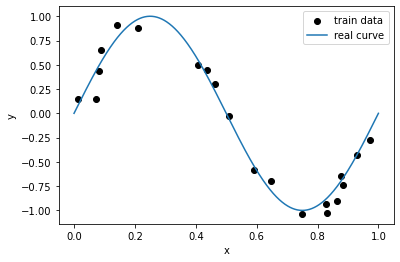

In [4]:
# Train data
train_data = Data[:20]
test_data = Data[20:]
# Tradin data scatter plot
plt.scatter(train_data["x"],train_data["y"],marker="o",c="black",label="train data")
# Real line
def real_func(x):
    return np.sin(2*np.pi*x)
x_points = np.linspace(0,1,1000)
plt.plot(x_points,real_func(x_points),label="real curve")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [5]:
# Ploy-regression
def ployreg(M):  
    global train_data
    x = train_data["x"].values
    X = np.ones((len(x),M+1))  
    for i in range(M):  
        X[:,i+1]=np.power(x,i+1)
    y = train_data["y"].values
    X_T = np.transpose(X)
    X_TX = np.dot(X_T,X)
    w = np.dot(np.linalg.inv(X_TX),np.dot(X_T,y))
    return w.round(4)


In [23]:
ployreg(5)

array([ 3.200000e-02,  4.602600e+00,  1.580810e+01, -1.073805e+02,
        1.425954e+02, -5.572870e+01])

In [8]:
# calculate error
def calerror(M):
    global train_data,test_data
    error = {}
    w = ployreg(M)
    # train error
    x = train_data["x"].values
    X = np.ones((len(x),M+1))  
    for i in range(M):  
        X[:,i+1]=np.power(x,i+1)
    y = train_data["y"].values
    e = np.dot(X,w)-y
    train_error = (np.dot(np.transpose(e),e))/len(x)
    # test error
    x = test_data["x"].values
    X = np.ones((len(x),M+1))  
    for i in range(M):  
        X[:,i+1]=np.power(x,i+1)
    y = test_data["y"].values
    e = np.dot(X,w)-y
    test_error = (np.dot(np.transpose(e),e))/len(x)
    error["train error"] = train_error.round(4)
    error["test error"] = test_error.round(4)
    return error

In [22]:
calerror(15)

{'train error': 0.0245, 'test error': 0.0384}

In [20]:
# learning curve
def errorplot():
    train_error = []
    test_error = []
    for M in range(10):
        error = calerror(M)
        train_error.append(error['train error'])
        test_error.append(error['test error'])
    M = range(10)
    # train error curve
    plt.plot(M,train_error,c="blue",label="train error")
    # test error curve
    plt.plot(M,test_error,c="green",label="test error")
    plt.xlabel("M")
    plt.ylabel("error")
    plt.legend()

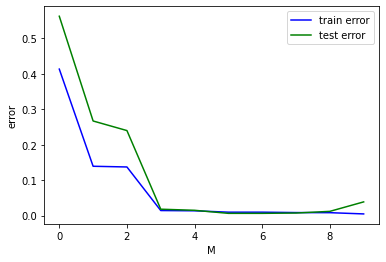

In [21]:
errorplot()

In [25]:
# draw regression curve
def regcurve(M):
    global train_data
    # Tradin data scatter plot
    plt.scatter(train_data["x"],train_data["y"],marker="o",c="black",label="train data")
    # real line
    x_points = np.linspace(0,1,1000)
    plt.plot(x_points,real_func(x_points),label="real curve")
    # regression curve
    w = ployreg(M)
    X_points = np.ones((len(x_points),M+1))
    for i in range(M):
        X_points[:,i+1] = np.power(x_points,i+1)
    y_points = np.dot(X_points,w)
    plt.plot(x_points,y_points,c="red",label="regression curve")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"M={M}")
    plt.legend()

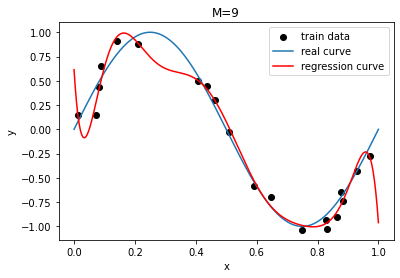

In [29]:
regcurve(9)

In [36]:
# 2*2 regplot
def multiplot():
    plt.figure(figsize=(10,8))
    plt.subplot(2,2,1)   
    regcurve(0) # M=0
    plt.subplot(2,2,2)
    regcurve(1) # M=1
    plt.subplot(2,2,3)
    regcurve(5) # M=5
    plt.subplot(2,2,4)
    regcurve(9)
    plt.tight_layout()

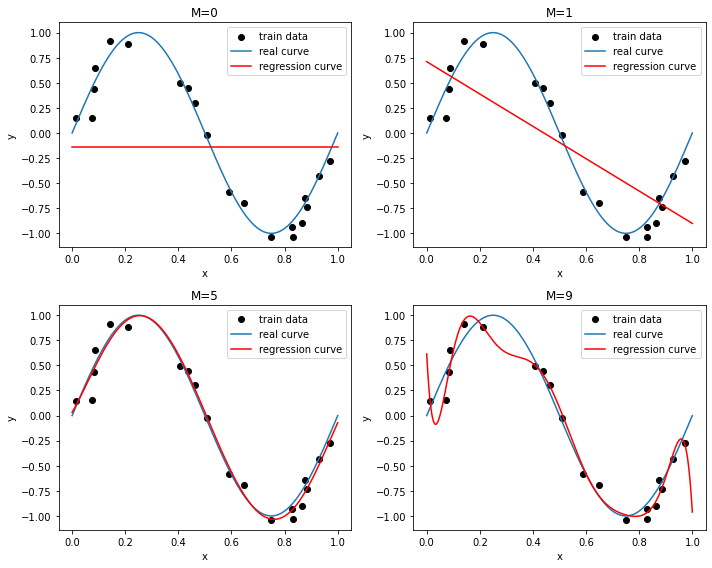

In [37]:
multiplot()